# Project 4: Clustering League of Legends Champions

##  Overview
For Project 4, I’m working with a [League of Legends champions dataset](https://www.kaggle.com/datasets/cutedango/league-of-legends-champions) from Kaggle. The goal is to explore and identify **clusters of champions based on their stats and roles**, which may help reveal trends or similarities in how champions are designed for different playstyles.


## Dataset Characteristics

- **167** champions  
- **20+** columns with no missing values  
- Includes champion stats like:
  - Base HP, Mana, Armor, Attack Damage, Speed
  - Roles (e.g., Top, Jungle)
  - Tags (e.g., Fighter, Mage, Tank)
  - Resource Types (e.g., Mana, Energy)


##  Research Questions

1. **Can we identify clusters of champions with similar roles or tags based on their stats (e.g., HP, attack damage, armor)?**  
2. **How do champions with certain resource types (e.g., Mana, Energy) cluster in terms of base stats and roles?**


In [6]:
import pandas as pd
df = pd.read_csv('C:/Users/19857/Downloads/LoL_champions.csv')

df.head()

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.0,0.0,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.0,0.8,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.0,0.0,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.2,0.7,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.5,0.8,62,3.75,2.125,0.625,0.625


## Preprocessing

We'll focus on numeric features related to combat stats to form clusters, and keep categorical columns (`Role`, `Tags`, `Resource type`) for later analysis.


In [9]:
features = [
    'Base HP', 'Base mana', 'Movement speed', 'Base armor', 'Base magic resistance',
    'Attack range', 'HP regeneration', 'Mana regeneration',
    'Attack damage', 'Attack speed'
]

X = df[features]


## Standardizing the Features

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Elbow Method to Find Optimal k

C:\Users\19857\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19857\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19857\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19857\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

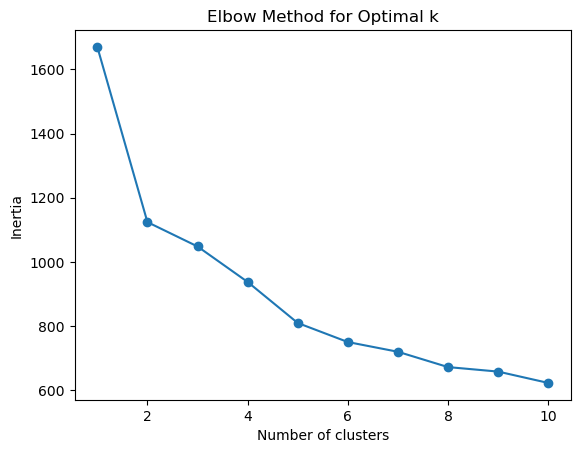

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## K-Means Clustering

In [18]:
# Assuming k=5 (based on Elbow plot analysis)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\19857\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Cluster Exploration


In [21]:
cluster_stats = df.groupby('Cluster')[features].mean()
role_counts = df.groupby('Cluster')['Role'].value_counts()
resource_counts = df.groupby('Cluster')['Resourse type'].value_counts()
tag_counts = df.groupby('Cluster')['Tags'].value_counts()

cluster_stats

,Base HP,Base mana,Movement speed,Base armor,Base magic resistance,Attack range,HP regeneration,Mana regeneration,Attack damage,Attack speed
Cluster,,,,,,,,,,
0,627.588235,153.205882,342.647059,33.705882,31.029412,150.735294,6.000000,3.016176,62.882353,0.672676
1,579.815789,423.421053,332.763158,23.105263,29.763158,538.815789,5.921053,8.706579,52.289474,0.646158
2,620.285714,321.833333,330.428571,26.666667,29.952381,490.000000,4.565476,7.565476,57.333333,0.647024
3,638.958333,340.687500,338.645833,35.270833,31.937500,157.291667,8.197917,7.409375,62.354167,0.646396
4,617.800000,240.000000,342.000000,30.800000,32.000000,210.000000,7.500000,50.000000,60.600000,0.660600


## Early Observations

- **Cluster 0**: Champions here have balanced stats, with decent HP, armor, and attack damage. These might be **well-rounded champions** like **Fighters** or **balanced Mages**.
- **Cluster 1**: These champions have **high mana and mana regen**, but lower attack and armor. They could be **Mages** or **Support** champions.
- **Cluster 2**: Champions in this group have average stats all around. These could be **versatile champions** like **Bruisers** or **Fighters**.
- **Cluster 3**: This cluster includes champions with **high HP and armor**, so they're likely **Tank** or **Bruiser** champions.
- **Cluster 4**: These champions have **high attack range** and **mana regen**, so they might be **ranged champions** or **mages**.

### Notes:
- There isn't a strict match between **roles** and **clusters**. For example, some **Mid (Middle)** champions show up in clusters like **Tank** or **Fighter**.
- **Energy-based champions** tend to group with those who have **high attack speed/damage**, like **Assassins**, while **Mana-based champions** often cluster with those relying on **mana regen**, like **Mages** or **Support**.


## Considerations

Clustering shows patterns based on champion stats, but it doesn't include:
- Champion win rates or popularity
- Player skill levels or item builds
- Ability scaling or utility

These factors can affect a champion's performance, so they should be considered when analyzing results or making balancing decisions.
